<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/tree/main/lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier


### Load dataset

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank_df.isnull().sum().sum()

0

In [ ]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###Preprocessing


*   Use LabelEncoder to convert the label into numbers.
*   Convert the features to one-hot encoding using `df_dummies = pd.get_dummies(df)`
*  Column "duration" must be deleted


drop duration column

In [ ]:
bank_preprocess = bank_df.drop(columns=['duration'])

handle ordinal categorical variables with label encoding

In [ ]:
bank_preprocess[["y"]] = bank_preprocess[["y"]].apply(LabelEncoder().fit_transform)

In [ ]:
#create df of norminal categorical variables 
df_obj = bank_preprocess.select_dtypes(include='object')

In [ ]:
df_obj.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
for cols in df_obj:
    print(cols + ':   ' + df_obj[cols].unique())

['job:   housemaid' 'job:   services' 'job:   admin.' 'job:   blue-collar'
 'job:   technician' 'job:   retired' 'job:   management'
 'job:   unemployed' 'job:   self-employed' 'job:   unknown'
 'job:   entrepreneur' 'job:   student']
['marital:   married' 'marital:   single' 'marital:   divorced'
 'marital:   unknown']
['education:   basic.4y' 'education:   high.school'
 'education:   basic.6y' 'education:   basic.9y'
 'education:   professional.course' 'education:   unknown'
 'education:   university.degree' 'education:   illiterate']
['default:   no' 'default:   unknown' 'default:   yes']
['housing:   no' 'housing:   yes' 'housing:   unknown']
['loan:   no' 'loan:   yes' 'loan:   unknown']
['contact:   telephone' 'contact:   cellular']
['month:   may' 'month:   jun' 'month:   jul' 'month:   aug'
 'month:   oct' 'month:   nov' 'month:   dec' 'month:   mar'
 'month:   apr' 'month:   sep']
['day_of_week:   mon' 'day_of_week:   tue' 'day_of_week:   wed'
 'day_of_week:   thu' 'day_of_wee

handle norminal categorical variavles with onehot encoding

In [ ]:
df_obj = pd.get_dummies(df_obj, prefix=["job", "marital", "education", "contact", "month", "day_of_week","poutcome", "default", "housing",	"loan"], drop_first=True)

In [ ]:
df_obj.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_unknown,contact_yes,month_unknown,month_yes,day_of_week_unknown,day_of_week_yes,poutcome_telephone,default_aug,default_dec,default_jul,default_jun,default_mar,default_may,default_nov,default_oct,default_sep,housing_mon,housing_thu,housing_tue,housing_wed,loan_nonexistent,loan_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
bank_preprocess.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#drop categorcial variables from df
bank_preprocess = bank_preprocess.select_dtypes(exclude=['object'])

In [ ]:
bank_preprocess.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#combine bank_preprocess and df_obj dataframe together
bank_combine = pd.concat([bank_preprocess, df_obj], axis=1)

In [ ]:
bank_combine.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_unknown,contact_yes,month_unknown,month_yes,day_of_week_unknown,day_of_week_yes,poutcome_telephone,default_aug,default_dec,default_jul,default_jun,default_mar,default_may,default_nov,default_oct,default_sep,housing_mon,housing_thu,housing_tue,housing_wed,loan_nonexistent,loan_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
bank_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

Plot histogram of the label and calculate the imbalance in the dataset.

Text(0, 0.5, 'Frequency')

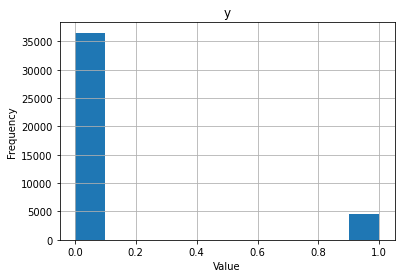

In [ ]:
bank_combine.hist(column='y')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
bank_combine['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

The dataset is largely imbalanced with 36,548 no(0) values and 4,640 yes(1) values.

calculate the imbalance in the dataset.

### Modelling

**Question 6:** 
*   Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.
*   Perform 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
*   Report the average F1 score with two numbers after the floating point (e.g., 0.56)

In [ ]:
#seperating the feature and target set again 
y = bank_combine['y']#target
X = bank_combine.drop(['y'], axis=1) #feature

In [ ]:
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 29238, 1: 3712})
Counter({0: 7310, 1: 928})


In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [ ]:
#creating a dummy classifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')
print("F1: %.2f +/- %.2f" % (dummy_scores.mean(), dummy_scores.std()))

F1: 0.10 +/- 0.01


In [ ]:
#using random forest model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state = 60)

#fit classifier
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [ ]:
#make prediction
rf_clf_pred = rf_clf.predict(X_test)

In [ ]:
#evaluating performance using 10 fold cross validation
rf_clf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='f1')

In [ ]:
print("F1: %.2f +/- %.2f" % (rf_clf_cv_score.mean(), rf_clf_cv_score.std()))


F1: 0.29 +/- 0.05


In [ ]:
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-rtmczze0
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-rtmczze0
  Created wheel for mlxtend: filename=mlxtend-0.19.0.dev0-py2.py3-none-any.whl size=1591825 sha256=6e9f3bf560a020b90ffdfe8a7ad2c9122932f4d3df96b0402319923c3af3b35c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fukmvuyu/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
#from mlxtend.evaluate import bias_variance_decomp
from mlxtend.evaluate import *

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# estimate bias and variance
mse, bias, var = bias_variance_decomp(rf_clf, X_train, y_train, X_test, y_test, loss='mse',random_seed=60)

TypeError: ignored

In [ ]:
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


Compare the results of your classifier with that of a dummy classifier.

**Question 7:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Perform 10-fold cross-validation using as a classifier a random forest with 100 estimators and a maximum depth of 8. Report the average F1 score with two numbers after the floating point (e.g., 0.56)

In [ ]:
#using random forest model
model_rf_new = RandomForestClassifier(n_estimators=200, random_state=60, max_depth=8)

#fit classifier
model_rf_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [ ]:
#make prediction
model_rf_new_pred = model_rf_new.predict(X_test)

In [ ]:
#evaluating performance using 10 fold cross validation
rf_cv_score_new = cross_val_score(model_rf_new, X_train, y_train, cv=10, scoring='f1')

In [ ]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_new.mean(), rf_cv_score_new.std()))

F1: 0.30 +/- 0.04


**Question 8:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Report the generalisation error of a random forest classifier with 400 estimators and a maximum depth of 6. Report the F1 score with two numbers after the floating point (e.g., 0.56).

Make sure you set the random_state parameter of RandomForestClassifier to 60.

In [ ]:
#using random forest model
model_rf_new_new = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state = 60, oob_score = True)

#fit classifier
model_rf_new_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=60, verbose=0,
                       warm_start=False)

In [ ]:
#make prediction
model_rf_new_new_pred = model_rf_new_new.predict(X_test)

In [ ]:
#evaluating performance using 10 fold cross validation
rf_cv_score_new_new = cross_val_score(model_rf_new_new, X_train, y_train, cv=10, scoring='f1')

In [ ]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_new_new.mean(), rf_cv_score_new_new.std()))

F1: 0.33 +/- 0.04


In [ ]:
print(model_rf_new_new.oob_score_)

0.9009408194233688


In [ ]:
errors = abs(model_rf_new_new_pred - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [ ]:
feature_importances = pd.DataFrame(model_rf_new_new.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [ ]:
print(feature_importances)

                                 importance
euribor3m                      1.673544e-01
nr.employed                    1.549891e-01
pdays                          9.849136e-02
loan_success                   8.537056e-02
emp.var.rate                   6.703580e-02
cons.conf.idx                  6.307965e-02
cons.price.idx                 5.223949e-02
age                            4.869665e-02
previous                       2.077895e-02
campaign                       2.048075e-02
poutcome_telephone             1.760526e-02
default_oct                    1.646680e-02
default_mar                    1.414336e-02
loan_nonexistent               1.323809e-02
default_may                    1.296860e-02
housing_mon                    9.541117e-03
month_yes                      7.293083e-03
education_university.degree    7.121159e-03
housing_thu                    6.251586e-03
housing_tue                    6.094212e-03
marital_single                 6.085079e-03
job_blue-collar                5

**Question 9:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Train a random forest classifier with 300 estimators and a maximum depth of 12, setting the random_state parameter to 60.

What are the top 3 features?

Use GridSearchCV to find a better set of parameters for your random forest.
Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV
What are the top 3 features?
Report the generalisation error (still using the same metric) on your test set.

In [ ]:
forestVC = RandomForestClassifier(random_state = 60,
                                  n_estimators = 400,
                                  max_depth = 12, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 300, 400]
max_depth = [3, 8, 12]
min_samples_split = [ 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forestVC, hyperF, cv = 10, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60,oob_score = True )
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=60, verbose=0,
                       warm_start=False)

In [ ]:
#make prediction
y_predicts = model_rf.predict(X_test)

In [ ]:
#evaluating performance using 10 fold cross validation
rf_cv_score_1 = cross_val_score(model_rf, X_train, y_train, cv=10, scoring='f1')

In [ ]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_1.mean(), rf_cv_score_1.std()))

F1: 0.31 +/- 0.02


In [ ]:
print(model_rf_new_new.oob_score_)

0.9006676783004552


In [ ]:
y_bias = (y - np.nanmean(y_predicts, axis=0)) **2
y_var = np.nanvar(y_predicts, axis=0, ddof = 1)
y_error = np.nanmean((y - y_predicts) **2, axis=0)#.mean()


print(np.nanmean(y_bias) +  np.nanmean(y_var))

clf_type = "Random Forest"
print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.nanmean(y_error), np.nanmean(y_bias), np.nanmean(y_var)))

print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.mean(y_bias) + np.mean(y_var), np.mean(y_bias), np.mean(y_var)))

ValueError: ignored

In [ ]:
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [ ]:
feature = model_rf.feature_importances_

In [ ]:
sort = np.sort(feature) 

In [ ]:
print(sort)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.48390009e-06 2.12943270e-05 3.09410891e-05
 3.13236733e-05 3.27423400e-05 4.57812214e-05 5.32744520e-05
 5.92591572e-05 6.21090493e-05 6.24615151e-05 6.79244488e-05
 7.62363906e-05 9.23235291e-05 1.46951187e-04 1.97590465e-04
 2.75142731e-04 3.10238653e-04 3.76769197e-04 3.81038127e-04
 4.21782355e-04 4.84473333e-04 5.01876477e-04 5.76359582e-04
 9.05564030e-04 9.56153438e-04 1.01776876e-03 1.04446562e-03
 1.27629171e-03 1.33016385e-03 1.70423691e-03 2.91041362e-03
 3.50904685e-03 4.92016905e-03 6.42119133e-03 9.02398149e-03
 1.00032243e-02 1.06756901e-02 1.46586861e-02 1.52502206e-02
 2.23533543e-02 4.34248850e-02 6.18528350e-02 7.79455593e-02
 1.09582388e-01 1.18161144e-01 2.32316964e-01 2.44439224e-01]


In [ ]:
plt.barh(boston.feature_names, rf.feature_importances_)

In [ ]:
print(feature_importances)

                                 importance
euribor3m                      1.731549e-01
nr.employed                    1.313384e-01
pdays                          8.436401e-02
loan_success                   7.049213e-02
age                            6.491814e-02
emp.var.rate                   5.610083e-02
cons.conf.idx                  5.409494e-02
cons.price.idx                 4.677671e-02
campaign                       3.122220e-02
previous                       1.976527e-02
poutcome_telephone             1.908046e-02
loan_nonexistent               1.263145e-02
default_oct                    1.238853e-02
month_yes                      1.217267e-02
housing_mon                    1.188556e-02
default_may                    1.139887e-02
default_mar                    1.127531e-02
education_university.degree    9.857278e-03
day_of_week_yes                9.583730e-03
marital_married                8.963863e-03
marital_single                 8.728927e-03
housing_tue                    8

In [ ]:
#kfold = model_selection.KFold(n_splits=10, random_state=60)
model=RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=60) 

results = cross_val_score(model, X, y, cv=10, scoring='f1')

print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.04 +/- 0.08


In [ ]:
m = RandomForestClassifier(n_estimators=300, max_depth = 12, random_state=60,oob_score=True)

m.fit(X_train, y_train)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':X_train.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, df_trn); fi[:10]


NameError: ignored